# Predicting House Price with Linear Regression

IMPORTS

In [56]:
import pandas as pd

In [57]:
import seaborn as sns

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

READING DATA IN AND STORING IT AS A DATAFRAME

In [60]:
df=pd.read_csv("all_perth_310121.csv")

In [61]:
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


CLEANING: DROPPING DUPLICATES, INDEXING, ADN REMOVING ADDRESS (COMPLEX DATA WITH NO REAL INFLUENCE ON PRICE)

In [62]:
df.drop_duplicates(subset=['ADDRESS'],inplace=True) # Some addresses actually have multiple entries
df.index = df['ADDRESS'] # set dataframe index, since it's not really a useful feature 
del df['ADDRESS'] 

In [63]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0


DROPPING NULL VALUES TO ENSURE MODEL RUNS

In [64]:
df=df.dropna()

In [65]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0


In [66]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,1.915100e+04,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000,19151.000000
mean,6.993700e+05,3.676100,1.861208,2.183385,2442.627069,187.485614,1988.955668,18332.232520,4189.241241,6086.265782,-31.949133,115.864554,1.684319,72.110334
std,3.871598e+05,0.750278,0.586938,1.221777,18471.385470,72.902194,21.871086,10935.931161,4175.115906,64.512901,0.167841,0.109218,1.571048,40.665889
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,1300.000000,46.000000,6003.000000,-32.455550,115.675834,0.070912,1.000000
25%,4.375000e+05,3.000000,2.000000,2.000000,494.000000,134.000000,1977.000000,10200.000000,1600.000000,6030.000000,-32.047309,115.779075,0.866026,38.000000
50%,5.850000e+05,4.000000,2.000000,2.000000,675.000000,177.000000,1995.000000,15800.000000,3000.000000,6065.000000,-31.937097,115.842067,1.301667,65.000000
75%,8.500000e+05,4.000000,2.000000,2.000000,809.000000,228.000000,2005.000000,24300.000000,5100.000000,6150.000000,-31.822986,115.940416,1.956207,105.000000
max,2.440000e+06,10.000000,7.000000,50.000000,999999.000000,849.000000,2017.000000,56900.000000,34300.000000,6558.000000,-31.595910,116.341780,20.720911,139.000000


In [67]:
df.isna()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Addis Way,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1 Ainsley Court,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1 Arundel Street,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1 Ashcott Gate,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1 Ashendon Boulevard,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9B Teocote Crescent,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9B Viveash Road,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0


In [69]:
x = df['BEDROOMS']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

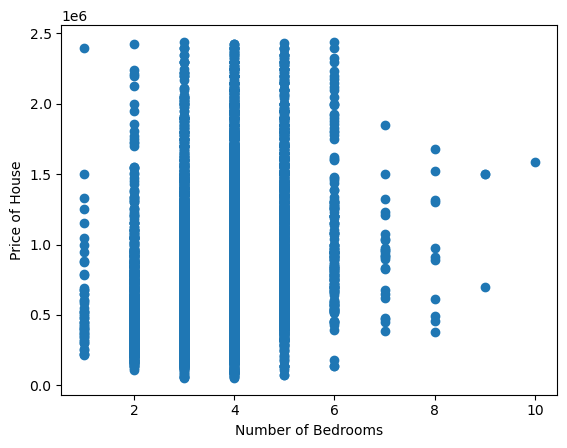

In [70]:
plt.scatter(x, y)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price of House")

NUMBER OF BEDROOMS HAS A CORRELATION TO PRICE

In [71]:
#land area

In [72]:
x = df['LAND_AREA']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

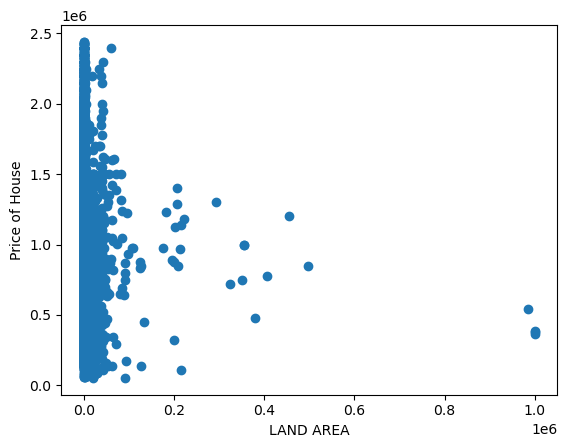

In [73]:
plt.scatter(x, y)
plt.xlabel("LAND AREA")
plt.ylabel("Price of House")

LAND AREA AND PRICE HAVE SOMEWHAT A LINEAR CORRELATION 

In [74]:
#floor area

In [75]:
x = df['FLOOR_AREA']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

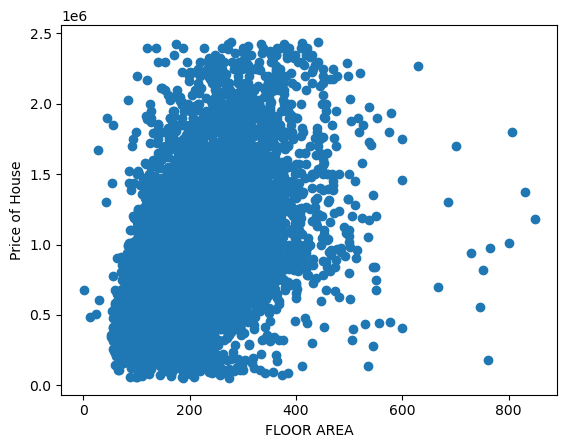

In [76]:
plt.scatter(x, y)
plt.xlabel("FLOOR AREA")
plt.ylabel("Price of House")

FLOOR AREA AND PRICE HAVE A LINEAR CORRELATION 

#suburb

BATHROOMS	

In [77]:
x = df['BATHROOMS']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

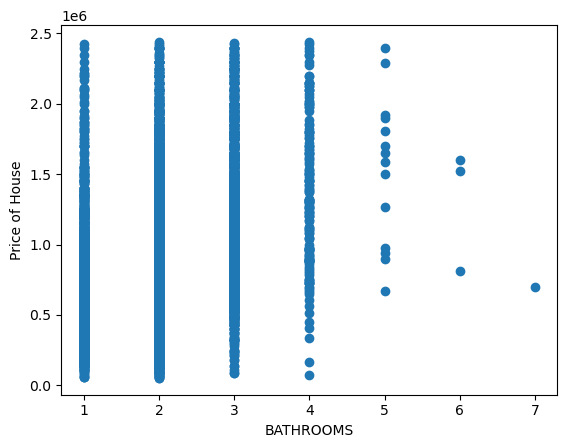

In [78]:
plt.scatter(x, y)
plt.xlabel("BATHROOMS")
plt.ylabel("Price of House")

BATHROOMS AND PRICE HAVE A LINEAR CORRELATION

#GARAGE

In [79]:
x = df['GARAGE']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

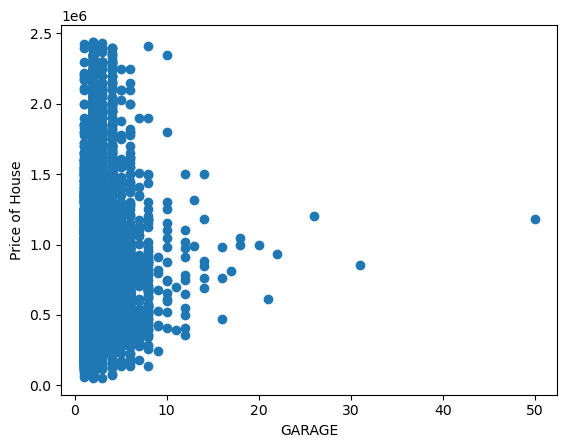

In [80]:
plt.scatter(x, y)
plt.xlabel("GARAGE")
plt.ylabel("Price of House")

GARAGE AND PRICE HAVE A WEAK CORRELATION 

#NEAREST_SCH_RANK

In [81]:
x = df['NEAREST_SCH_RANK']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

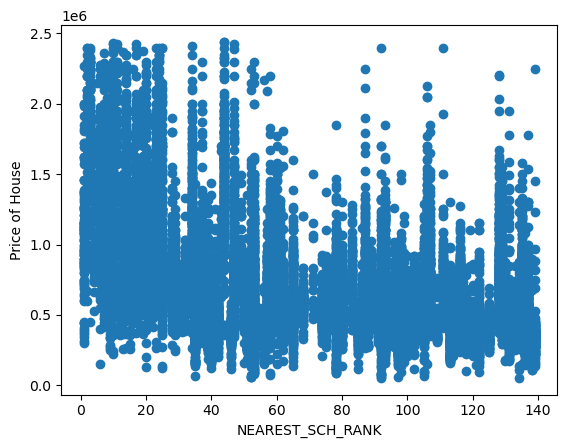

In [82]:
plt.scatter(x, y)
plt.xlabel("NEAREST_SCH_RANK")
plt.ylabel("Price of House")

NEAREST SCHOOL RANK AND PRICE HAVE ALMOST INVERSE CORRELATION

In [83]:
#NEAREST_SCH_DIST

In [84]:
x = df['NEAREST_SCH_DIST']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

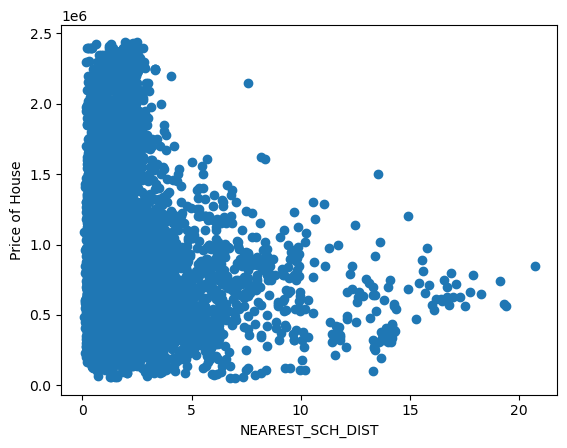

In [85]:
plt.scatter(x, y)
plt.xlabel("NEAREST_SCH_DIST")
plt.ylabel("Price of House")

NEAREST_SCH_DIST AND PRICE OF HOUSE ARE RELATED POSITIVELY

In [86]:
#buildyear

In [87]:
x=df['BUILD_YEAR']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

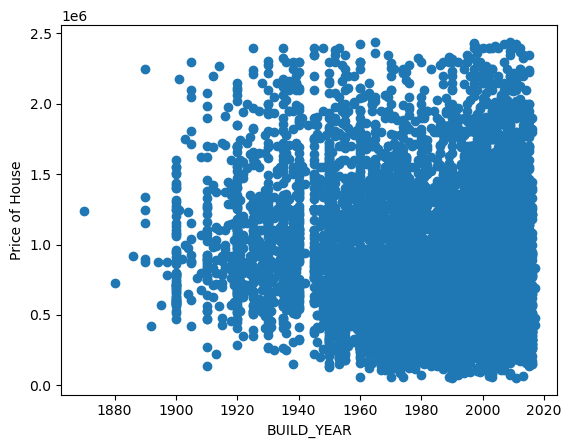

In [88]:
plt.scatter(x, y)
plt.xlabel("BUILD_YEAR")
plt.ylabel("Price of House")

BUILD YEAR HAS A POSITIVE RELATIONSHIP()

In [89]:
x=df['LATITUDE']
y = df['PRICE']

Text(0, 0.5, 'Price of House')

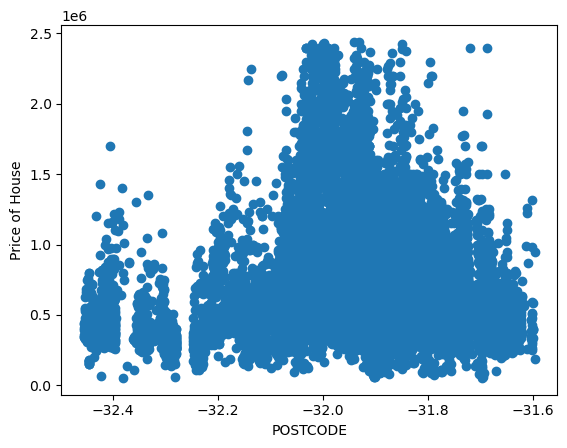

In [90]:
plt.scatter(x, y)
plt.xlabel("POSTCODE")
plt.ylabel("Price of House")

HOUSES IN THE NORTH TEND TO BE PRICED HIGHER

In [91]:
df.select_dtypes(include="object")

,SUBURB,NEAREST_STN,DATE_SOLD,NEAREST_SCH
ADDRESS,,,,
1 Addis Way,Wandi,Kwinana Station,02-2019\r,ATWELL COLLEGE
1 Ainsley Court,Camillo,Challis Station,06-2015\r,KELMSCOTT SENIOR HIGH SCHOOL
1 Arundel Street,Bayswater,Bayswater Station,10-2019\r,CHISHOLM CATHOLIC COLLEGE
1 Ashcott Gate,Butler,Butler Station,11-2018\r,BUTLER COLLEGE
1 Ashendon Boulevard,Hammond Park,Cockburn Central Station,07-2019\r,ATWELL COLLEGE
...,...,...,...,...
9B North Street,Swanbourne,Grant Street Station,04-2017\r,SCOTCH COLLEGE
9B Teocote Crescent,Aubin Grove,Cockburn Central Station,05-2016\r,ATWELL COLLEGE
9B Viveash Road,Middle Swan,Midland Station,04-2015\r,LA SALLE COLLEGE


In [92]:
df.select_dtypes(include="float")

,GARAGE,BUILD_YEAR,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,
1 Addis Way,2.0,2013.0,-32.193470,115.859554,5.524324,129.0
1 Ainsley Court,1.0,1979.0,-32.120578,115.993579,1.649178,113.0
1 Arundel Street,8.0,1999.0,-31.917880,115.907050,0.936243,29.0
1 Ashcott Gate,2.0,2003.0,-31.654280,115.702200,0.680843,39.0
1 Ashendon Boulevard,4.0,2002.0,-32.159590,115.849480,2.220643,129.0
...,...,...,...,...,...,...
9B North Street,4.0,2009.0,-31.981771,115.765149,0.762346,24.0
9B Teocote Crescent,2.0,2011.0,-32.176013,115.858357,3.607062,129.0
9B Viveash Road,2.0,2014.0,-31.872192,116.013543,1.116806,53.0


SPLITTING DATA INTO CATEGORICAL AND NUMERICAL TYPES

In [93]:
categoricals = df.select_dtypes(include="object")
categoricals.columns

Index(['SUBURB', 'NEAREST_STN', 'DATE_SOLD', 'NEAREST_SCH'], dtype='object')

In [94]:
numerical_index = df.index

In [95]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0


In [96]:
numericals=df.select_dtypes(include="number")
numericals.columns

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [97]:
numericals.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,
1 Addis Way,365000,3,2,2.0,351,139,2013.0,26900,4900,6167,-32.193470,115.859554,5.524324,129.0
1 Ainsley Court,287000,3,1,1.0,719,86,1979.0,22600,1900,6111,-32.120578,115.993579,1.649178,113.0
1 Arundel Street,685000,3,2,8.0,552,126,1999.0,5900,508,6053,-31.917880,115.907050,0.936243,29.0
1 Ashcott Gate,367500,3,2,2.0,398,158,2003.0,36300,2100,6036,-31.654280,115.702200,0.680843,39.0
1 Ashendon Boulevard,535000,4,2,4.0,704,247,2002.0,23100,3900,6164,-32.159590,115.849480,2.220643,129.0


SCALING AND TRANSFORMING DATA

In [98]:
scaler_minmax = MinMaxScaler()

In [99]:
# Exclude 'PRICE' column from scaling
numericals_without_price = numericals.drop(columns=['PRICE'])

# Scale the remaining numerical columns
for column in numericals_without_price.columns:
    column_data = numericals_without_price[column].values.reshape(-1, 1)
    scaled = scaler_minmax.fit_transform(column_data)
    numericals_without_price[column] = scaled.flatten()

# Concatenate the scaled columns with the 'PRICE' column
numericals_scaled = pd.concat([numericals_without_price, numericals['PRICE']], axis=1)

In [100]:
X = numericals_scaled[['BEDROOMS', 'BATHROOMS', 'GARAGE', 'FLOOR_AREA', 'NEAREST_SCH_DIST', 'LAND_AREA', 'NEAREST_STN_DIST']]
y = numericals_scaled[['PRICE']]

In [101]:
numericals_scaled

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK,PRICE
ADDRESS,,,,,,,,,,,,,,
1 Addis Way,0.222222,0.166667,0.020408,0.000290,0.162736,0.972789,0.460432,0.141706,0.295495,0.304871,0.275877,0.264088,0.927536,365000
1 Ainsley Court,0.222222,0.000000,0.000000,0.000658,0.100236,0.741497,0.383094,0.054125,0.194595,0.389665,0.477133,0.076429,0.811594,287000
1 Arundel Street,0.222222,0.166667,0.142857,0.000491,0.147406,0.877551,0.082734,0.013487,0.090090,0.625459,0.347199,0.041905,0.202899,685000
1 Ashcott Gate,0.222222,0.166667,0.020408,0.000337,0.185142,0.904762,0.629496,0.059964,0.059459,0.932099,0.039591,0.029537,0.275362,367500
1 Ashendon Boulevard,0.333333,0.166667,0.061224,0.000643,0.290094,0.897959,0.392086,0.112512,0.290090,0.344284,0.260750,0.104103,0.927536,535000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,0.333333,0.333333,0.061224,0.000353,0.325472,0.945578,0.145683,0.014947,0.012613,0.551136,0.134118,0.033483,0.166667,1700000
9B Teocote Crescent,0.222222,0.166667,0.020408,0.000187,0.126179,0.959184,0.424460,0.165061,0.290090,0.325179,0.274081,0.171242,0.927536,423000
9B Viveash Road,0.333333,0.166667,0.020408,0.000339,0.154481,0.979592,0.284173,0.071641,0.095495,0.678607,0.507111,0.050649,0.376812,467000


In [102]:
df=df.dropna()

In [103]:
df

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ADDRESS,,,,,,,,,,,,,,,,,,
1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
1 Arundel Street,Bayswater,685000,3,2,8.0,552,126,1999.0,5900,Bayswater Station,508,10-2019\r,6053,-31.917880,115.907050,CHISHOLM CATHOLIC COLLEGE,0.936243,29.0
1 Ashcott Gate,Butler,367500,3,2,2.0,398,158,2003.0,36300,Butler Station,2100,11-2018\r,6036,-31.654280,115.702200,BUTLER COLLEGE,0.680843,39.0
1 Ashendon Boulevard,Hammond Park,535000,4,2,4.0,704,247,2002.0,23100,Cockburn Central Station,3900,07-2019\r,6164,-32.159590,115.849480,ATWELL COLLEGE,2.220643,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9B North Street,Swanbourne,1700000,4,3,4.0,414,277,2009.0,9400,Grant Street Station,558,04-2017\r,6010,-31.981771,115.765149,SCOTCH COLLEGE,0.762346,24.0
9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0


SPLIT INTO TRAIN, TEST DATA

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

DEFINE THE MODEL USED

In [113]:
lm = LinearRegression()

In [114]:
model = lm.fit(X_train, y_train)

In [115]:
model.coef_

array([[-461435.29314859,  550066.68217568,  490429.07100969,
        2394996.96798477,  -16598.56653737,  677625.46166314,
        -609357.79462178]])

In [116]:
model.intercept_

array([291294.48069991])

PREDICT THE OUTPUT ON THE TEST DATA

In [117]:
y_pred = np.array(model.predict(X_test))


In [118]:
y_pred = np.array(model.predict(X_test))

In [119]:
y_test.reset_index(inplace=True)

In [120]:
pd.DataFrame(y_pred)[0]

0       1.097929e+06
1       3.384790e+05
2       7.345460e+05
3       6.348299e+05
4       5.791226e+05
            ...     
4783    8.089697e+05
4784    6.659746e+05
4785    9.681211e+05
4786    7.637234e+05
4787    7.848925e+05
Name: 0, Length: 4788, dtype: float64

In [121]:
y_pred.shape

(4788, 1)

In [122]:
real_vs_pred = pd.DataFrame({'y_test': y_test['PRICE'], 'y_pred':pd.DataFrame(y_pred)[0]})

In [123]:
real_vs_pred

,y_test,y_pred
0,860000,1.097929e+06
1,280000,3.384790e+05
2,585000,7.345460e+05
3,449000,6.348299e+05
4,740000,5.791226e+05
...,...,...
4783,1837500,8.089697e+05
4784,1300000,6.659746e+05
4785,960000,9.681211e+05
4786,930000,7.637234e+05


In [124]:
mse = mean_squared_error(real_vs_pred['y_test'], real_vs_pred['y_pred'])

In [125]:
rmse = np.sqrt(mse)
print("RMSE of model is ", rmse)

RMSE of model is  306783.0421154133


In [127]:
y_pred = y_pred.reshape(4788) #Required to plot model metrics

Plotting model metrics (test vs output, histogram of residuals and homoscedasticity)

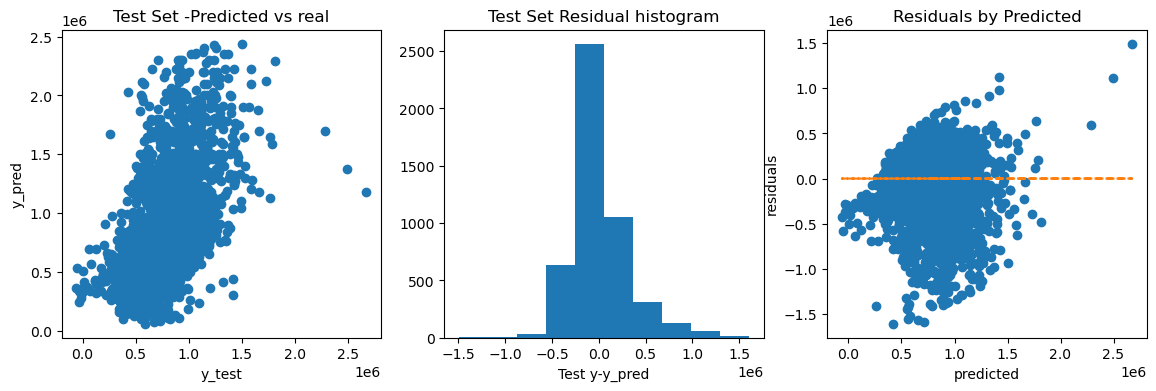

In [128]:
## Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['PRICE'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
ax[1].hist(y_test['PRICE'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['PRICE']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

PLOTTING IMPORTANCE COEFFICIENTS OF VARIOUS FEATURES USED FOR THE MODEL

In [129]:
coefficients = model.coef_.reshape(-1,1)

In [130]:
coefficients = coefficients.reshape(7,)

In [131]:
coefficients.shape

(7,)

In [132]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

In [133]:
feature_importances

,variable,coefficient
0,BEDROOMS,-4.614353e+05
1,BATHROOMS,5.500667e+05
2,GARAGE,4.904291e+05
3,FLOOR_AREA,2.394997e+06
4,NEAREST_SCH_DIST,-1.659857e+04
5,LAND_AREA,6.776255e+05
6,NEAREST_STN_DIST,-6.093578e+05


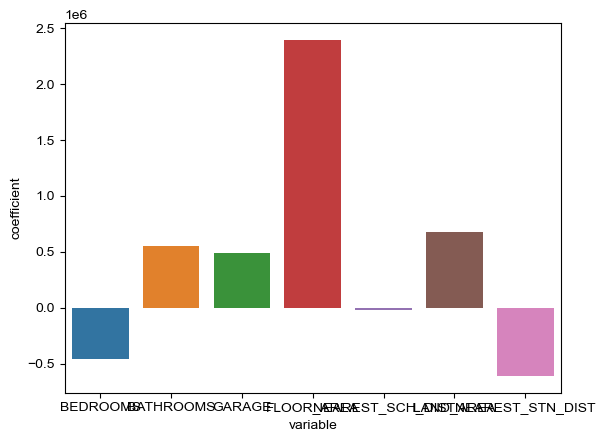

In [134]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])
sns.set(rc={'figure.figsize':(19.1,9.27)})